## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## data 정보 확인

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# x값(예측변수), y값(목표변수) 설정
- svm 시각화를 위해 x변수는 2개만 지정

In [4]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , 2:4 ]
y = df_iris.iloc[:, 4 ]

In [5]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# df_iris.data = df_iris.loc[ : , 'Sepal.Length':'Petal.Width' ] .values
# df_iris.feature_names = list( df_iris.drop('Species', axis=1) )

# df_iris.target = df_iris['Species']
# df_iris.target_names = list( df_iris['Species'].unique() )

# y값에 대한 Label Encoding 실행
- SVM 수행을 위해서는 y값을 숫자로 변환 필요

In [7]:
# 문자로 된 범주형 데이터를 숫자로 변환한 컬럼 추가

encoder = LabelEncoder()
encoder.fit(df_iris['Species'])

y2 = encoder.transform(df_iris['Species'])
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 학습/테스트용 데이터셋 분리

In [8]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y2,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({1: 37, 0: 35, 2: 33})

Counter({2: 17, 0: 15, 1: 13})


# 모델 생성 및 학습

## LinearSVC 모델 생성

In [9]:
model_svm = SVC( kernel = 'linear' )

## train 데이터로 학습 수행

In [10]:
# 모델 학습
model_svm.fit( x_train, y_train )

SVC(kernel='linear')

In [11]:
# 모델의 정답에 대한 정보 확인
model_svm.classes_

array([0, 1, 2])

# 시각화

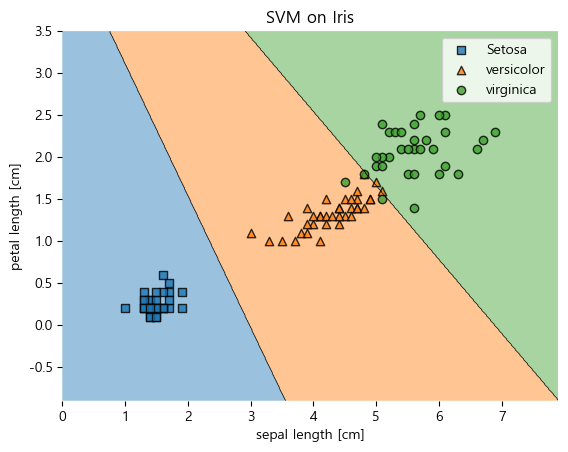

In [12]:
# Plotting decision regions
plot_decision_regions( x_train.values, y_train,
                       clf = model_svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('versicolor')
L.get_texts()[2].set_text('virginica')

plt.show()

## 마진을 표현하는 선 추가 ( 종속변수가 3개 이상일때는 안먹히는데 이유를 모르겠음)

In [13]:
# 마진을 표현하는 선 추가 ( 종속변수가 3개 이상일때는 안먹히는데 이유를 모르겠음)

# 결정 함수 플로팅
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()

# 모델 평가를위한 그리드 생성
#xx = np.linspace(xlim[0], xlim[1], 30)  # 0에서 1까지의 구간을 30개 간격으로 나눈 배열 생성 
#yy = np.linspace(ylim[0], ylim[1], 30)
#YY, XX = np.meshgrid(yy, xx)
#xy = np.vstack([XX.ravel(), YY.ravel()]).T

#Z = model_svm.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])

#plt.show()

# 예측 및 평가

## 학습된 모델로 예측 수행

In [14]:
# 새로운 테스트 데이터로 예측하기
model_svm.predict( [ [4.0, 0.2] ] )

array([1])

In [15]:
# test 데이터로 라벨 예측
y_pred = model_svm.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

,y_True,y_Predict,Pred_Result
0,0,0,True
1,0,0,True
2,2,2,True
3,0,0,True
4,2,2,True
5,0,0,True
6,2,2,True
7,2,2,True
8,2,2,True
9,2,1,False


## 평가

### Confusion Metrix

In [16]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1,2
pred,,,
0,15,0,0
1,0,13,0
2,0,2,15


In [17]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 15]], dtype=int64)

### 분석 지표

In [18]:
# Accuracy
model_svm.score( x_test, y_test )

0.9555555555555556

In [19]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9555555555555556

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.867     1.000     0.929        13
           2      1.000     0.882     0.938        17

    accuracy                          0.956        45
   macro avg      0.956     0.961     0.955        45
weighted avg      0.961     0.956     0.956        45




### ROC curve / AUC

Accuracy:  1.0
AUC:  1.0



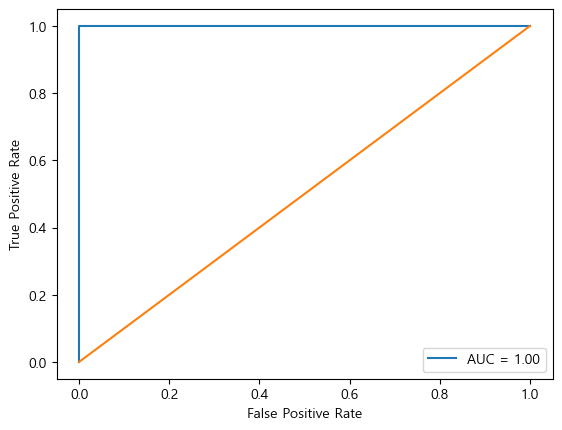

In [20]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 0, 1, 0 )
y_pred_1 = np.where( y_pred == 0, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_1, y_pred_1)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

Accuracy:  0.9555555555555556
AUC:  0.96875



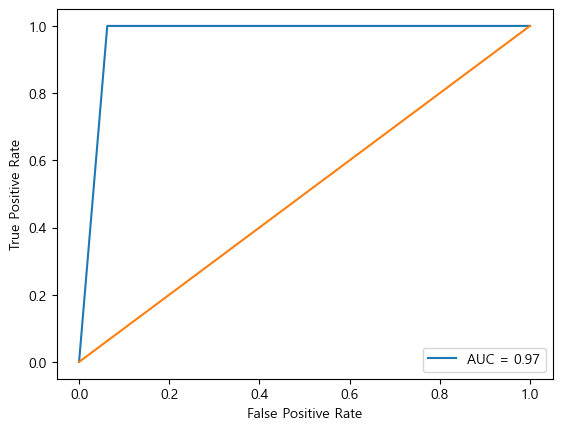

In [21]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 1, 1, 0 )
y_pred_2 = np.where( y_pred == 1, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_2, y_pred_2)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

Accuracy:  0.9555555555555556
AUC:  0.9411764705882353



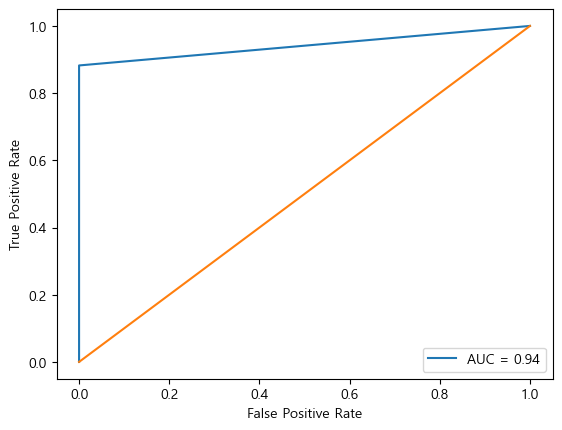

In [22]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 2, 1, 0 )
y_pred_3 = np.where( y_pred == 2, 1, 0 )

# Accuracy
acc = accuracy_score(y_test_3, y_pred_3)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

In [23]:
print(C)

NameError: name 'C' is not defined